In [43]:
import numpy as np
import matplotlib.pyplot as plt


In [44]:
def get_sensor_value(sensor='GCaMP6s'):

    if sensor == 'GCaMP6s':
        #GCaMP6s
        rise_time  = 0.480   # rise time constant in seconds
        decay_time = 1.796  # decay time constant in seconds
    elif sensor == 'GCaMP6m':
        #GCaMP6m
        rise_time  = 0.280
        decay_time = 1.1162
    elif sensor == 'GCaMP6f':
        #GCaMP6f
        rise_time  = 0.080
        decay_time = 0.400
    elif sensor == 'GCaMP7b':
        #GCaMP7b
        rise_time  = 0.1326
        decay_time = 0.3736
    elif sensor == 'GCaMP7c':
        #GCaMP7c
        rise_time  = 0.1252
        decay_time = 0.5413
    elif sensor == 'GCaMP7f':
        #GCaMP7f
        rise_time  = 0.0268   # 1 AP half rise time constant in seconds
        decay_time = 0.2976   # 1 AP half decay time constant in seconds
    elif sensor == 'GCaMP8f':   
        #GCaMP8f
        rise_time  = 0.0066   # rise time constant in seconds
        decay_time = 0.0875   # decay time constant in seconds
    elif sensor == 'GCaMP8m':   
        #GCaMP8m
        rise_time  = 0.0074   # 1 AP half rise time constant in seconds
        decay_time = 0.134    # 1 AP half decay time constant in seconds
    elif sensor == 'GCaMP8s':   
        #GCaMP8s
        rise_time  = 0.0102   # 1 AP half rise time constant in seconds
        decay_time = 0.330    # 1 AP decay time constant in seconds
    elif sensor == 'JEDI-1p':
        #JEDI-1p
        rise_time  = 0.01   # 1 AP half rise time constant in seconds
        decay_time = 0.001  # 1 AP half decay time constant in seconds
    return rise_time, decay_time

100


Text(0, 0.5, 'Firing rate (Hz)')

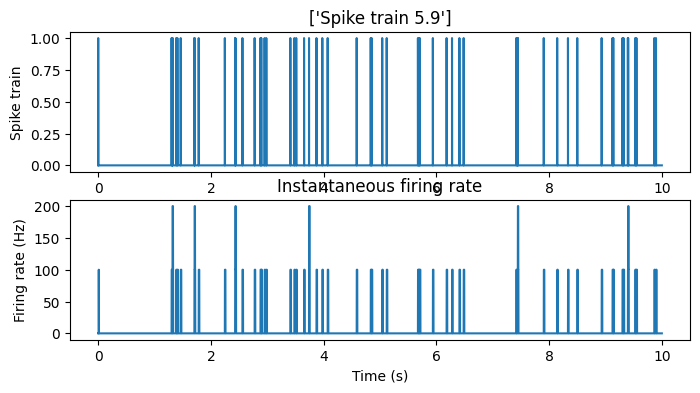

In [75]:
sampling_frequency = 10000  # 100 kHz
duration = 10  # 1 second
spike_probability = 5/sampling_frequency  # 0.1%
downtime=1

# Generate time axis
time = np.arange(0, duration, 1.0/sampling_frequency)

# add refractory period

# Generate spike train signal
spike_train = np.random.choice([0, 1], size=len(time), p=[1-spike_probability, spike_probability])

# first spike at 0.1 s no spikes
spike_train[0:int(downtime*sampling_frequency)] = 0
spike_train[1]=1

# plot spike train
fig = plt.figure(figsize=(8, 6))
subplots = fig.subplots(2, 1)
subplots[0].set_title(['Spike train '+str(np.sum(spike_train/duration))])
subplots[0].plot(time, spike_train)
subplots[0].set_xlabel('Time (s)')
subplots[0].set_ylabel('Spike train')

# calculate instantaneous firing rate (derive interspike intervals and calc rate from that) 
window_size =  0.01 # 100 ms
window_size_in_samples = int(window_size * sampling_frequency)
instantaneous_firing_rate = np.zeros(len(time))

print(window_size_in_samples)
for i in range(len(time)):
    if i < window_size_in_samples:
        instantaneous_firing_rate[i] = 0 
    else:
        instantaneous_firing_rate[i] = np.sum(spike_train[i-window_size_in_samples:i]) / window_size

# plot instantaneous firing rate
subplots[1].set_title('Instantaneous firing rate')
subplots[1].plot(time, instantaneous_firing_rate)
subplots[1].set_xlabel('Time (s)')
subplots[1].set_ylabel('Firing rate (Hz)')


Text(0, 0.5, 'Calcium Signal')

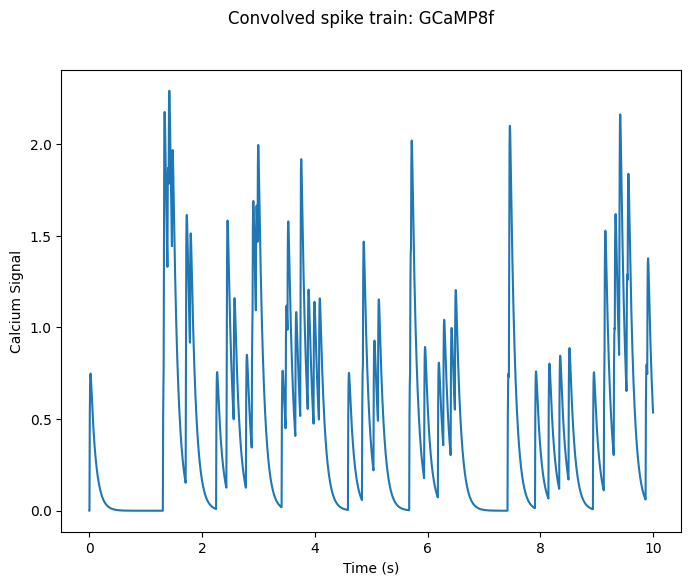

In [83]:
sensor = 'GCaMP8f'
rise_time, decay_time = get_sensor_value(sensor)

# Calculate the calcium signal
calcium_signal = np.convolve(spike_train, np.exp(-time / decay_time) - np.exp(-time / rise_time))
calcium_signal = calcium_signal[0:time.size]
# Plot the calcium signal
fig = plt.figure(figsize=(8, 6))
fig.suptitle('Convolved spike train: ' + sensor)
plt.plot(time,calcium_signal)
plt.xlabel('Time (s)')
plt.ylabel('Calcium Signal')


Text(0, 0.5, 'Calcium Signal')

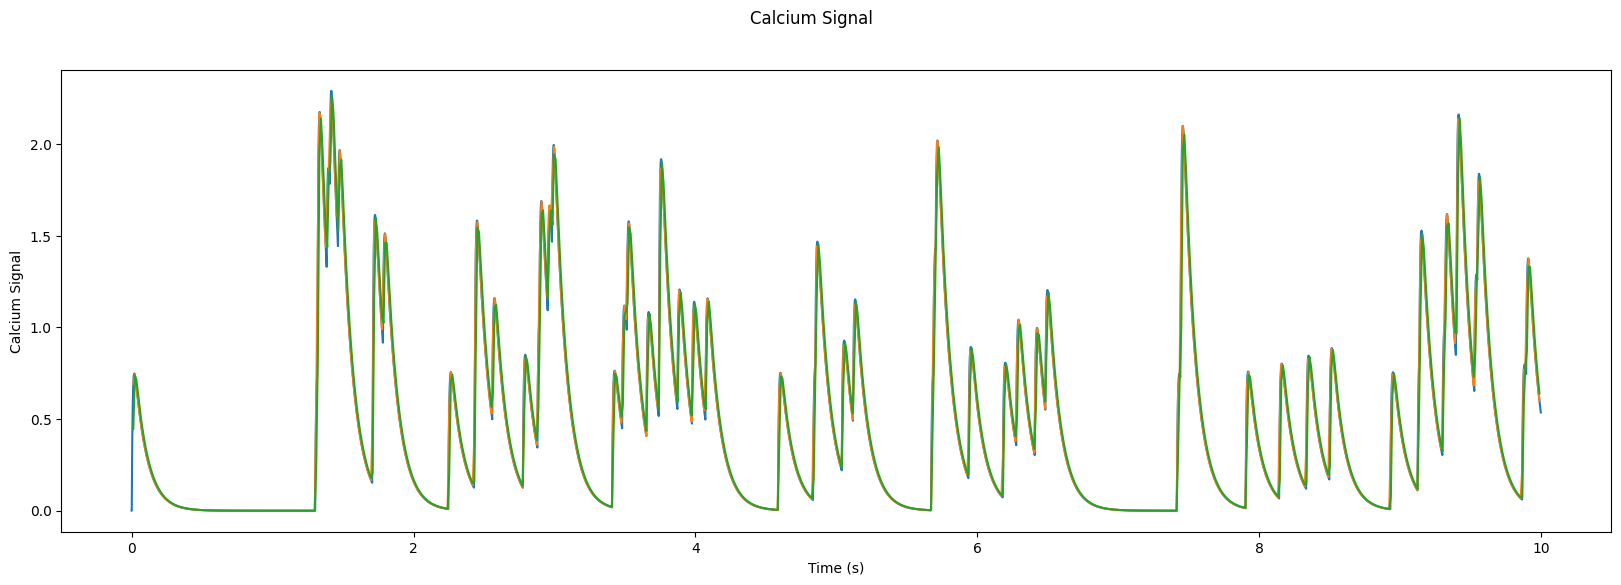

In [82]:
recording_frequency = 90 # 30 Hz
time_new = time[int(sampling_frequency/recording_frequency):-1:int(sampling_frequency/recording_frequency)]

calcium_signal_2p = calcium_signal[int(sampling_frequency/recording_frequency):-1:int(sampling_frequency/recording_frequency)]
# now instead of resampling, average sampling
calcium_signal_1p = np.zeros(len(time_new))
for i in range(len(time_new)):
    calcium_signal_1p[i] = np.mean(calcium_signal[i*int(sampling_frequency/recording_frequency):(i+1)*int(sampling_frequency/recording_frequency)])

# plot calcium trace again but sampled at 30Hz. once with instantaneous sampling and once with average interval sampling
fig = plt.figure(figsize=(20, 6))
fig.suptitle('Calcium Signal')
plt.plot(time,calcium_signal, label='Original')
plt.plot(time_new,calcium_signal_2p, label='Instantaneous sampling')
plt.plot(time_new,calcium_signal_1p, label='Average interval sampling')
plt.xlabel('Time (s)')
plt.ylabel('Calcium Signal')


In [78]:
1000/12

83.33333333333333